In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import math
import pandas as pd
sns.set()

# LISTA 1

### ZADANIE 1

Rozpatrzymy zmienną losową $Y = exp(X)$, gdzie $X∼N (μ, σ)$. Zmienna losowa Y ma rozkład log-normalny $Y ∼ LN (μ, σ)$.

a) Wyznacz dystrybuantę zmiennej losowej $Y$ i wyraź ją w języku dystrybunaty standardowego rozkładu normalnego (oznaczamy ją $\Phi(x)$) - na tablecie

b) Wyznacz gęstość zmiennej losowej $Y$ - na tablecie

c) Na podstawie danych ze strony www, które są realizacjami zmiennej losowej $X ∼ N (0, 1)$, wyznacz realizacje zmiennej losowej $Y$.

d) Dla danych odpowiadających zmiennej $X$ oraz zmiennej $Y$ narysuj histogramy.

e) Dla danych odpowiadających zmiennej $X$ oraz zmiennej $Y$ narysuj unormowane histogramy w taki sposób, aby mogły być one porównane z gęstościami teoretycznymi odpowiednich zmiennych losowych. Na wykresach z unormowanymi histogramami narysuj teoretyczne gęstości zmiennych losowych $X$ oraz $Y$.

f ) Zaproponuj metodę do wyznaczania gęstości empirycznej, która jest wygładzoną wersją unormowanego histogramu. Narysuj gęstość empiryczną dla danych odpowiadających zmiennej $X$ oraz #Y# oraz teoretyczną odpowiadającą danej zmiennej losowej.

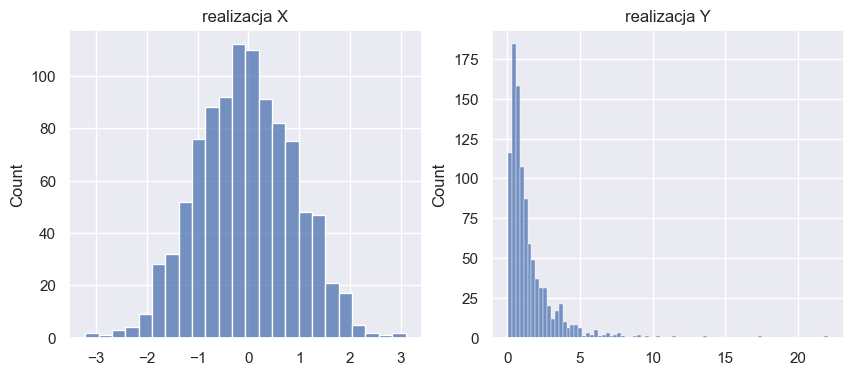

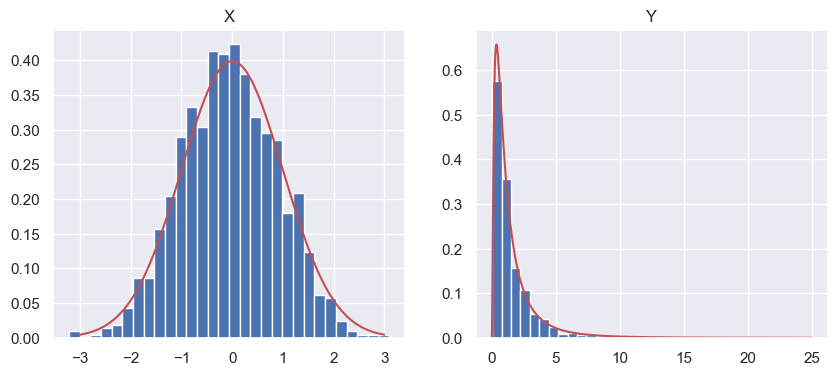

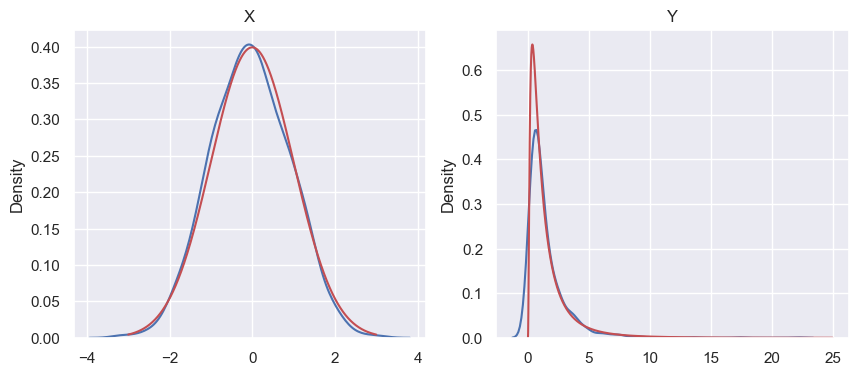

In [39]:
# podpunkt C
XS = np.loadtxt('.\lista_1\dane.txt', dtype = float)
YS = np.zeros(len(XS))
for i in range(len(XS)):
    YS[i] = np.exp(float(XS[i]))

# podpunkt D
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))    
sns.histplot(XS, ax = ax1)
ax1.set_title('realizacja X')
sns.histplot(YS, ax = ax2)
ax2.set_title('realizacja Y')
plt.show()

# podpunkt E
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(XS, density=True, bins=30)
x = np.arange(-3,3,0.001)
ax1.plot(x,stats.norm.pdf(x,0,1), c="r")
ax1.set_title('X')
ax2.hist(YS, density=True, bins=30)
x = np.arange(0,25,0.001)
ax2.plot(x,stats.lognorm.pdf(x,1), c="r")
ax2.set_title('Y')
plt.show()

# podpunkt F
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(XS, ax = ax1)
x = np.arange(-3,3,0.001)
ax1.plot(x,stats.norm.pdf(x,0,1), c="r")
ax1.set_title('X')
sns.kdeplot(YS, ax = ax2)
x = np.arange(0,25,0.001)
ax2.plot(x,stats.lognorm.pdf(x,1), c="r")
ax2.set_title('Y')
plt.show()


### ROZKŁAD PARETO - ZAD 2, 3, 4 

In [40]:
# PARAMETRY DO ZAD 2 3 4
alfa = 3
lambda1 = 1
n = 1000

#### ZADANIE 2

Wykorzystując metodę odwrotnej dystrybuanty wysymuluj próbę o długości 1000 z rozkładu Pareto z parametrami $α > 0$ i $λ > 0$, w którym Dystrybuanta wyraża sie następującym wzorem:

$F (x) = 1 − ( \frac{λ}{λ + x})^α, x > 0. (1)$

Współczynniki $α$ i $λ$ wybierz w ten sposób, aby wariancja rozważanego rozkładu była skończona.

In [41]:
def generate_pareto(alfa, lambda1,n):
    # X = (lambda1/(1-U)**(1/alfa) - lambda1)
    xs = []
    for i in range(0,n):
        U = np.random.uniform()
        xs.append((lambda1/(1-U)**(1/alfa) - lambda1))
    return xs

pareto = generate_pareto(alfa,lambda1,n)

#### ZADANIE 3 I 4

Dla danych z rozkładu Pareto zdefinowanego w równaniu (1) wyznacz dystrybuantę empiryczną i porówanaj ją z dystrybunatą teoretyczną rozkładu Pareto z wybranymi parametrami.

Dla rozkładu Pareto z zadania 3 wyznacz gęstość. Dla wysymulowanych danych porównaj gęstość empiryczną oraz teoretyczną.

Text(0.5, 1.0, 'gestosc')

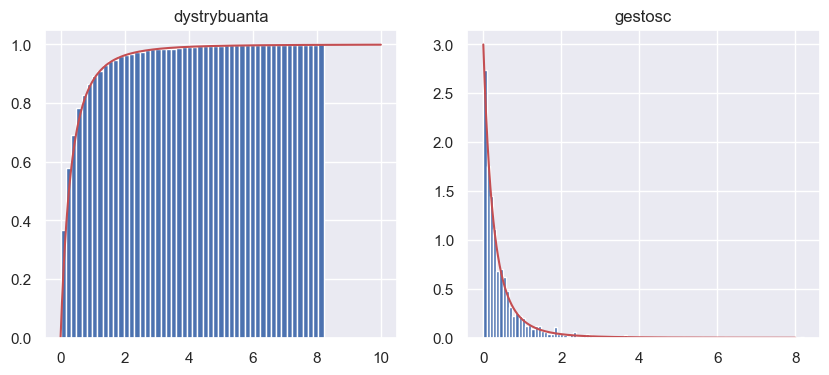

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.hist(pareto, bins=50,density=True,cumulative = True)
x = np.arange(0,10,0.001)
ax1.plot(x, stats.pareto.cdf(x,3, loc=-1), 'r')
ax1.set_title('dystrybuanta')
ax2.hist(pareto, bins=100, density=True)
x = np.arange(0,8,0.001)
ax2.plot(x, stats.pareto.pdf(x,3, loc=-1), 'r-')
ax2.set_title('gestosc')

### ZADANIE 5 - ROZKŁAD BURRA

Niech $Z$ będzie zmienną losową z rozkładu Pareto z parametrami $α$ oraz $λ$. Zmienna losowa z rozkładu Burra z parametrami $α, λ, τ > 0$ zdefiniowana jest jako $W = Z^{1/τ}$.

a) Wyznacz gęstość oraz dystrybuantę zmiennej losowej $W$ - na tablecie

b) Wysymuluj 1000 obserwacji odpowiadających zmiennej losowej $W$.

c) Gęstość empiryczną (wyznaczoną na podstawie wysymulowanej próby) porównaj z gęstoscią teoretyczną zmiennej losowej $W$. 

d) Dystrybuantę empiryczną (wyznaczoną na podstawie wysymulowanej próby) porównaj z dystrybuantą teoretyczną zmiennej losowej $W$.

Text(0.5, 1.0, 'podpunkt D')

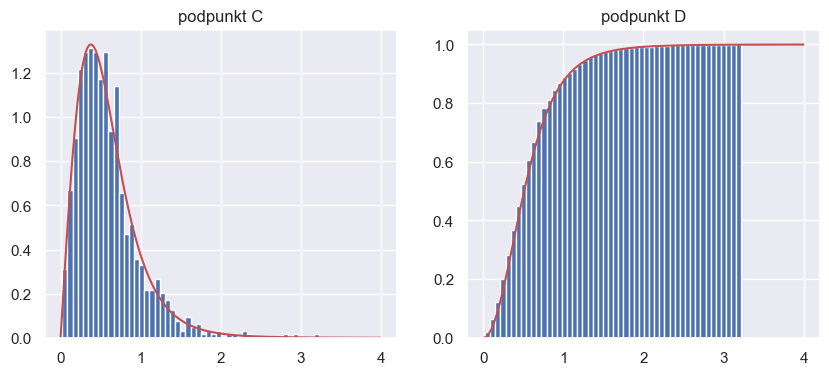

In [44]:
# PARAMETRY
n = 1000
alfa = 3
lambda5 = 1
tau = 2

# PODPUNKT B
def burr(lambda_, alfa, tau, n):
    samples_p = generate_pareto(alfa, lambda_, n)
    samples_b = [i**(1/tau) for i in samples_p]
    return samples_b

samples = burr(lambda5, alfa, tau, n)

# PODPUNKT C
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(samples, bins=50,density=True)
x = np.arange(0.0001,4,0.001)
y = ((lambda5**alfa)*alfa*tau*x**(tau-1))/((lambda5+x**tau)**(alfa+1))
ax1.plot(x, y, 'r-')
ax1.set_title("podpunkt C")

# PODPUNKT D
ax2.hist(samples, bins=50,density=True, cumulative=True)
x = np.arange(0.0001,4,0.001)
y = 1-(lambda5/(lambda5+x**tau))**alfa
ax2.plot(x, y, 'r-')
ax2.set_title("podpunkt D")


# LISTA 2

### ZADANIE 1 - CHARAKTERYSTKI STATYSTYCZNE

W wybranym środowisku napisz program do wyznaczania następujących charakterystyk dla danego wektora obserwacji: mediana, kwartyle, rozstęp z próby, rozstęp międzykwartylowy, wariancja z próby oraz odchylenie standardowe. Wyznacz powyższe charakterystyki dla wysymululowanej próby z rozkładu normalnego z parametrami $μ = 2$ i $σ = 2$ o długości 2000 elementów.

In [45]:
# PARAMETRY
mu = 2
sigma = 2
sample = np.random.normal(mu, sigma, 2000)

# MEDIANA
def median(lst):
    n = len(lst)
    if n < 1:
        return None
    elif n % 2 == 1:
        return sorted(lst)[n // 2]
    else:
        return sum(sorted(lst)[n // 2 - 1:n // 2 + 1]) / 2.0
    
# KWARTYLE
def quartiles(numbers):
    # zwraca wartości pierwszego, drugiego i trzeciego kwartylu
    numbers = sorted(numbers)
    n = len(numbers)
    q1_index = (n - 1) // 4
    q2_index = (n - 1) // 2
    q3_index = 3 * (n - 1) // 4
    q1 = numbers[q1_index]
    q2 = numbers[q2_index]
    q3 = numbers[q3_index]
    return q1, q2, q3

# ROZSTĘP MIEDZYKWARTYLOWY
def rozstep_miedzykwartylowy(numbers):
    q1, q2, q3 = quartiles(numbers)
    return q3 - q1

# ROZSTĘP Z PRÓBY
def rozstep(numbers):
    max_value = max(numbers)
    min_value = min(numbers)
    return max_value - min_value

# WARIANCJA
def wariancja(numbers):
    n = len(numbers)
    mean = sum(numbers) / n
    variance = sum((x - mean) ** 2 for x in numbers) / (n - 1)
    return variance

# ODCHYLENIE
def odchylenie(numbers):
    variance = wariancja(numbers)
    std_dev = math.sqrt(variance)
    return std_dev

print("Mediana: ", median(sample))
print("Mediana: ", np.median(sample))
Q1, Q2, Q3 = quartiles(sample)
print("Kwartyle: ", Q1, Q2, Q3)
print("Kwartyle: ", np.percentile(sample, 25), np.percentile(sample, 50), np.percentile(sample, 75))
print("Rozstęp międzykwartylowy: ", rozstep_miedzykwartylowy(sample))
print("Rozstęp międzykwartylowy: ", np.percentile(sample, 75)-np.percentile(sample, 25))
print("Rozstęp międzykwartylowy: ", stats.iqr(sample))
print("Wariancja z próby: ", wariancja(sample))
print("Wariancja z próby: ", np.var(sample))
print("Odchylenie standardowe: ", odchylenie(sample))
print("Odchylenie standardowe: ", np.std(sample))


Mediana:  1.9703766904596143
Mediana:  1.9703766904596143
Kwartyle:  0.5870259776713223 1.9690461934328074 3.3097167401506877
Kwartyle:  0.5890716742748419 1.9703766904596143 3.311313285401824
Rozstęp międzykwartylowy:  2.7226907624793655
Rozstęp międzykwartylowy:  2.7222416111269823
Rozstęp międzykwartylowy:  2.7222416111269823
Wariancja z próby:  3.897505618283241
Wariancja z próby:  3.895556865474101
Odchylenie standardowe:  1.9742101251597413
Odchylenie standardowe:  1.973716510918957


### ZADANIE 2

Niech $X$ będzie zmienną losową z rozkładu normalnego z parametrami $μ$ i $σ$. Wyznacz rozkład $Y = |X − E(X)|$. Wysymuluj próbę z rozkładu $N (μ, σ)$. Porównaj teoretyczną wartość $E(Y)$ z przeciętnym odchyleniem od średniej dla wysymulowanej próby. Wykonaj rysunek odległości tych dwóch wielkości w zależności o długosci wysymulowanej próby.

Teoretyczna wartość E(Y): 1.5957691216057308


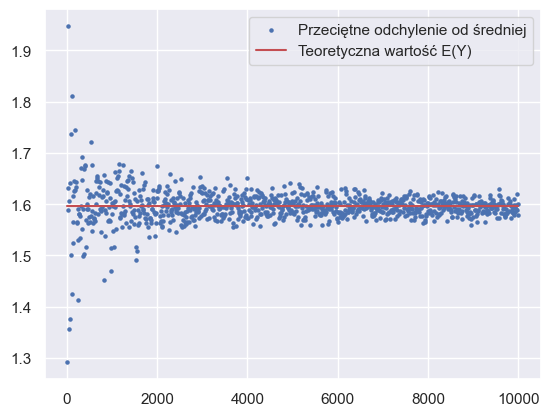

In [48]:
# PARAMETRY
mu = 2
sigma = 2

# WARTOŚĆ TEORETYCZNA
def E_Y(sigma):
    return np.sqrt(2/np.pi) * sigma

# WARTOŚĆ PRZYBLIŻONA
def Y(x, mu, sigma):
    return np.abs(x - mu)

n_values = [10*i for i in range(1,1000)]
means = []
for n in n_values:
    sample = np.random.normal(mu, sigma, n)
    y_values = Y(sample, mu, sigma)
    means.append(np.mean(y_values))
    
E_Y_value = E_Y(sigma)
print("Teoretyczna wartość E(Y):", E_Y_value)
plt.scatter(n_values, means, label='Przeciętne odchylenie od średniej', s=5)
plt.plot(n_values, [E_Y_value]*len(n_values), label='Teoretyczna wartość E(Y)', color='r')
plt.legend();

### ZADANIE 3

Na stronie internetowej znajdź dowolne dane o co najmniej 1000 obserwacjach. Dla tych danych wyznacz średnią arytmetyczną, harmoniczną, geometryczną. Ponadto przedstaw wykres średniej ucinanej i winsorowskiej jako funkcję parametru $k$.

srednia arytmetyczna:  68121.59706959708
srednia harmoniczna:  59347.65732465998
srednia geometryczna:  63510.49654736023


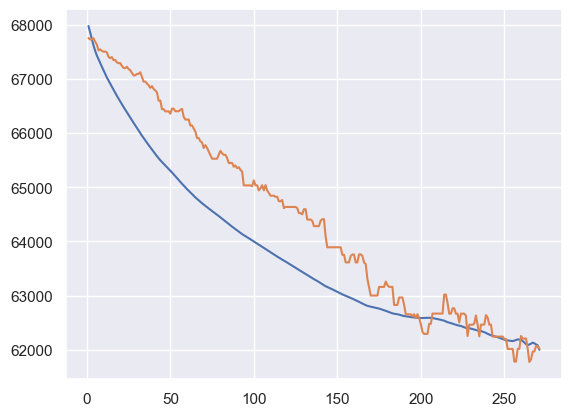

In [51]:
dane = pd.read_csv('.\lista_2\HousePrices.csv')
ceny = dane.price
print("srednia arytmetyczna: ", np.mean(ceny))
print("srednia harmoniczna: ", stats.hmean(ceny))
print("srednia geometryczna: ", stats.gmean(ceny))

# SREDNIA WINSOROWSKA
def winsorized_mean(data, k):
    sorted_data = sorted(data)
    n = len(sorted_data)
    wmean = (k*sorted_data[k]+sum(sorted_data[k+1:n-1-k])+ k*sorted_data[n-k])/n
    return wmean

# SREDNIA UCINANA
def tmean(data,k):
    sorted_data = sorted(data)
    n = len(sorted_data)
    return (sum(sorted_data[k:n-k]))/(n-2*k)

xs = range(1,272)
ys = [tmean(ceny,k) for k in xs]
plt.plot(xs,ys)
ys = [winsorized_mean(ceny,k) for k in xs]
plt.plot(xs,ys);

### ZADANIE 4

Dla danych z poprzedniego zadania wykonaj wykres pudełkowy i zinterpretuj otrzymany wynik.

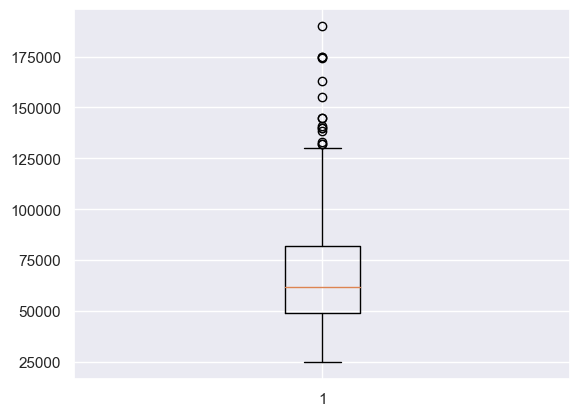

In [52]:
plt.boxplot(ceny);

# LISTA 4

### ZADANIE 1

Dla rozkładu lognormalnego wyznacz wartość średnią, następnie sprawdź, czy średnia z próby jest nieobciążonym estymatorem parametru średniej. Wysymuluj próbę prostą z rozkładu lognormalnego i na podstawie Metody Monte Carlo sprawdź własności estymatora.

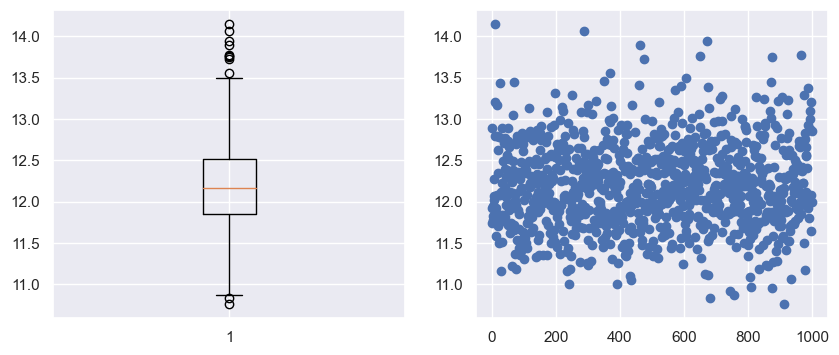

Średnia próby:  12.00156979613217
Rzeczywista średnia:  12.182493960703473
Wariancja próby:  0.23325360976788212
Rzeczywista wariancja:  0.2550156343901585


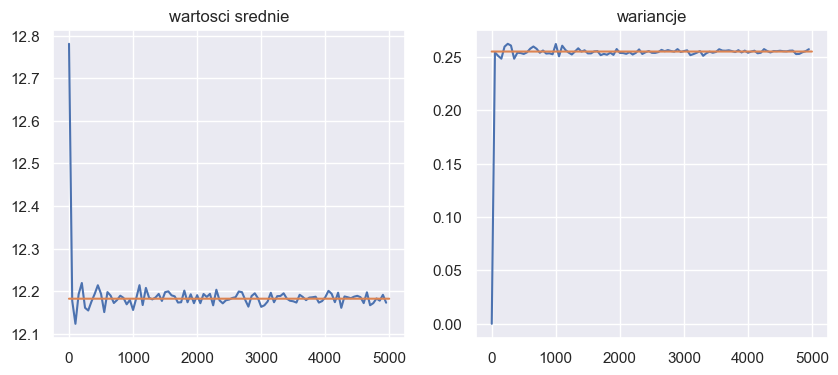

In [60]:
# PARAMETRY
mu = 2
sigma = 1
n = 1000 
samples = np.random.lognormal(mu, sigma, n)

M = 1000 
estimates = []
for i in range(M):
    samples = np.random.normal(mu, sigma, n)
    sampleslog = np.exp(samples)
    sample_mean = np.mean(sampleslog)
    estimates.append(sample_mean)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.boxplot(estimates)
ax2.scatter(range(0,M),estimates)
plt.show()

sample_mean = np.mean(sampleslog)
print("Średnia próby: ", sample_mean)
true_mean = np.exp(mu + sigma**2/ 2)
print("Rzeczywista średnia: ", true_mean)
sample_var = np.var(sampleslog)/n
print("Wariancja próby: ", sample_var)
true_var = (np.exp(sigma**2)-1)*np.exp(2*mu+sigma**2)/n
print("Rzeczywista wariancja: ", true_var)

num_trials = 1000
Ns = range(1,5000,50)
means = [(np.mean([np.mean(np.random.lognormal(mu, sigma, m)) for _ in range(num_trials)])) for m in Ns]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(Ns, means)
ax1.plot([true_mean for _ in range(5000)])
ax1.set_title('wartosci srednie')
vars = [(np.mean([np.var(np.random.lognormal(mu, sigma, m))/n for _ in range(num_trials)])) for m in Ns]
ax2.plot(Ns, vars)
ax2.plot([true_var for _ in range(5000)])
ax2.set_title('wariancje')
plt.show()

### ZADANIE 2

Rozpatrzmy próbę prostą $X_1$, $...$, $X_n$ oraz statystykę $U = max{X1, ..., Xn}$. Znajdź rozkład statystyki $U$ dla próby z następujących rozkładów:

a) normalnego,

b) lognormalnego,

c) Pareto.

Narysuj dystrybuanty empiryczne statystyki $U$ dla rozpatrywanych rozkładów.

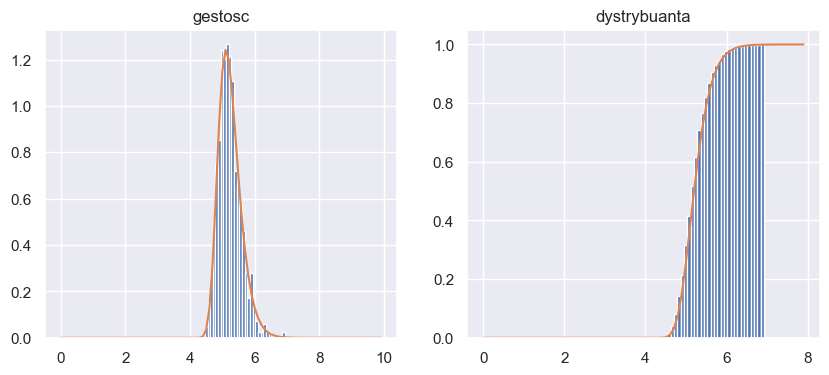

In [66]:
# TYLKO NORMALNY
n = 1000
sigma = 1
mu = 2
M=1000
us = []
for _ in range(M):
    U = max([np.random.normal(mu,sigma) for _ in range(n)])
    us.append(U)
    
xs = np.arange(0,10,0.1)
F = stats.norm.cdf(xs,mu,sigma)
f = stats.norm.pdf(xs,mu,sigma)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(us, bins=30, density=True)
ax1.plot(xs, n*F**(n-1)*f)
ax1.set_title("gestosc")
ax2.hist(us, bins=30, density=True, cumulative=True)
xs = np.arange(0,8,0.1)
ax2.plot(xs, stats.norm.cdf(xs,mu,sigma)**n)
ax2.set_title("dystrybuanta");

### ZADANIE 6

Niech $X_1$, $...$, $X_n$ oznacza losową próbę z przesuniętego rozkładu Pareto $P(x_0, α)$ o gęstości 

$f (x) = \frac{α}{x_0}(\frac{x_0}{x})^{\alpha+1}1_{(x_0,∞)}(x), x0 > 0, α > 0.$

Wyznacz estymator największej wiarygodności parametru $(x_0, α)$. Zaprogramuj tę procedurę w wybranym środowisku.

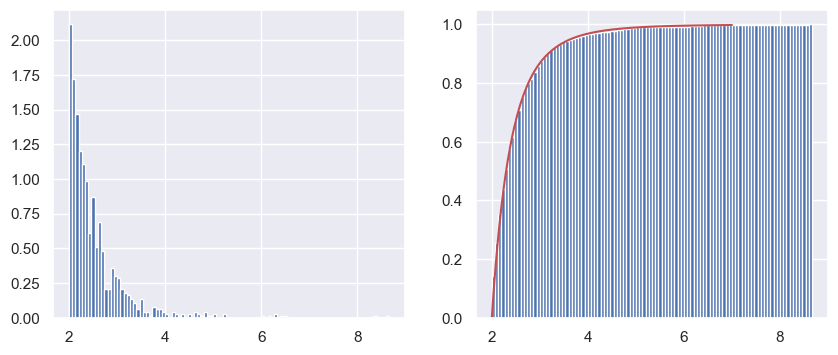

[2.000519584090162, 2.001111112176166, 2.0001811570258434, 2.000105721379478, 2.0000240268154172, 2.000039740897283, 2.0006388120959415, 2.0011672737609563, 2.000405339619892, 2.0003898351671285, 2.000150872785179, 2.0008373443577376, 2.001584831611404, 2.00017881487898, 2.000014265113052, 2.001481861614556, 2.0001116041651876, 2.0004220929377428, 2.0002431922228663, 2.0000589435175753, 2.000144022107484, 2.0000512467253935, 2.0003560488882455, 2.0005420791765336, 2.0001074290823384, 2.000165908316626, 2.0002794929547143, 2.000339108579806, 2.0010865339841875, 2.000299453864621, 2.000478693636137, 2.0015319320246565, 2.000476663465736, 2.000069468083036, 2.000084934660526, 2.0002812096988154, 2.0003664228585403, 2.000019054487312, 2.0005564052611597, 2.0000649037555567, 2.0003638520059903, 2.000331984577992, 2.0002483405817344, 2.000577359573913, 2.000326040076179, 2.001054968437515, 2.000078242544963, 2.0001483150131247, 2.0001858940271906, 2.0006029257743543, 2.0000101411233455, 2.00

Text(0.5, 1.0, 'alfa')

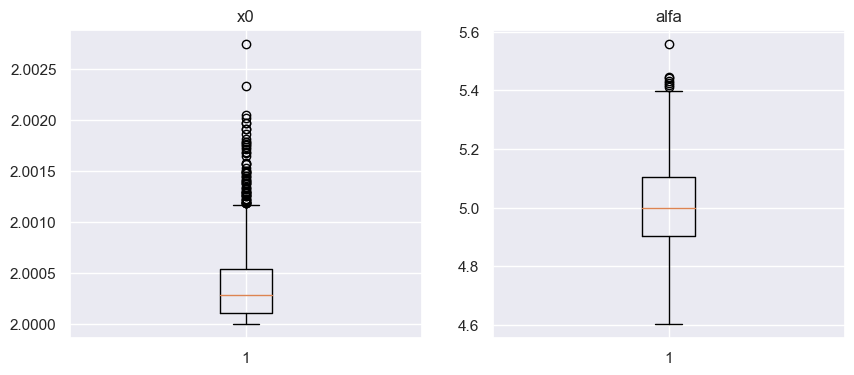

In [70]:
# PARAMETRY
x0 = 2
alfa = 5
n = 1000
# ROZKLAD PARETO
U = np.random.uniform(0,1,n)
X = x0*U**(-1/alfa)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.hist(X, bins=100, density=True)
ax2.hist(X, bins=100, density=True, cumulative=True)
xs = np.linspace(2,7,1000)
F=1-(x0/xs)**alfa
ax2.plot(xs, F, color='r')
plt.show()

# FUNKCJA DO WYLICZANIA ESTYMATAROW x0 I alfa
def paretos(x):
    n = len(x)
    x_hat = min(x)
    alfa_hat = n/(np.sum(np.log(x))-n*np.log(x_hat))
    return x_hat, alfa_hat

alfas, xs = [], []
for i in range(1000):
    U = np.random.uniform(0,1,n)
    X = x0*U**(-1/alfa)
    x, a = paretos(X)
    alfas.append(a)
    xs.append(x)
print(xs)
print(alfas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.boxplot(xs)
ax1.set_title('x0')
ax2.boxplot(alfas)
ax2.set_title('alfa')

### ZADANIE 7

a) Pokaż, że jeśli $X$ ma rozkład wykładniczy z parametrem $λ = 1$, wówczas $Y = X + θ$ ma gęstość daną następującym wzorem:

$f (x) = e^{−(x−θ)}, x > θ. (1)$   - NA TABLECIE

b) Napisz procedurę do symulacji zmiennych zmiennych losowych z rozkładu o gęstości danej wzorem (1).

c) Wyznacz estymator parametru $θ$ wykorzystując metodę największej wiarygodności - NA TABLECIE

d) Wykorzystując metodę Monte Carlo sprawdź poprawność estymatora.

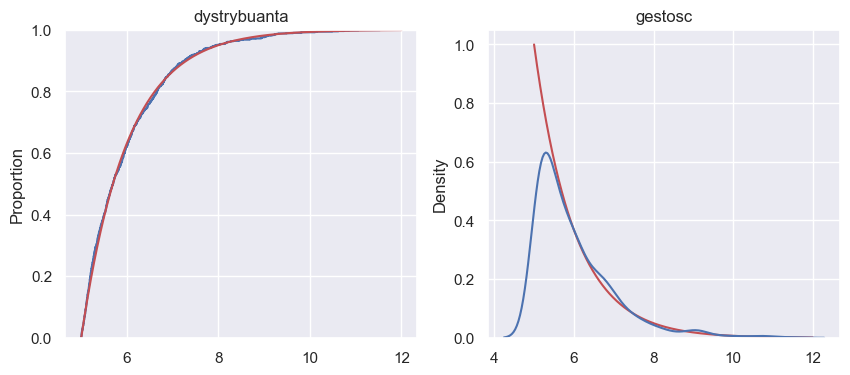

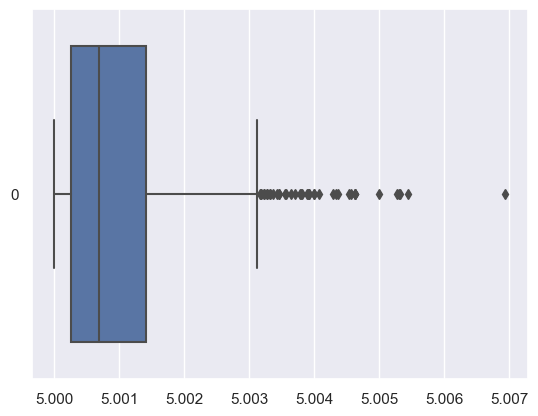

In [75]:
# PODPUNKT B
def theta(t, n):
    exp = np.random.exponential(1,size=n)
    return exp + t
t = 5
ts = theta(5,1000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
sns.ecdfplot(ts, ax=ax1)
xs = np.linspace(5,12,1000)
F = 1 - np.exp(-xs+t)
ax1.plot(xs, F, color='r')
ax1.set_title('dystrybuanta')
xs = np.linspace(5,12,1000)
F = np.exp(-xs+t)
ax2.plot(xs, F, color='r')
sns.kdeplot(ts, ax=ax2)
ax2.set_title('gestosc')
plt.show()

# PODPUNKT D
theta_hats = []
for i in range(0,1000):
    ts = theta(5,1000)
    theta_hats.append(min(ts))
sns.boxplot(theta_hats, orient='horizontal')
plt.show();

### ZADANIE 8

Niech $X_1$, $...$, $X_{2n+1}$ będzie próbą prostą z rozkładu normalnego z nieznaną średnią $μ$ oraz wariancją $σ^2 = 1$. Rozważmy dwa estymatory parametru $μ$: próbkowa średnia oraz próbkowa mediana. Aby sprawdzić, który estymator jest lepszy wysumuluj próbę ze standardowego
rozkładu normalnego i znajdź błąd średniokwadratowy dla obydwu estymatorów. Powtórz tą procedurę 100 razy, aby uzyskać próbkową wartość oczekiwaną błędu estymacji. Jakie wnioski możesz wyciągnąć na podstawie tego eksperymentu?

Błąd średniej dla N = 10: 0.04253784198927798, Błąd mediany dla N = 10: 0.06739436038679017
Błąd średniej dla N = 20: 0.02574395679199391, Błąd mediany dla N = 20: 0.04052375113926105
Błąd średniej dla N = 30: 0.016329952973257133, Błąd mediany dla N = 30: 0.02410969361218747
Błąd średniej dla N = 40: 0.013159121797745008, Błąd mediany dla N = 40: 0.01890906599342749
Błąd średniej dla N = 50: 0.009224187345876845, Błąd mediany dla N = 50: 0.014495249281275342
Błąd średniej dla N = 60: 0.00792011513861302, Błąd mediany dla N = 60: 0.013508383886381745
Błąd średniej dla N = 70: 0.007181409681360525, Błąd mediany dla N = 70: 0.010664308974144755
Błąd średniej dla N = 80: 0.006400597031019156, Błąd mediany dla N = 80: 0.010748867464548844
Błąd średniej dla N = 90: 0.005468734881640463, Błąd mediany dla N = 90: 0.008795252286706579
Błąd średniej dla N = 100: 0.0050644740841237785, Błąd mediany dla N = 100: 0.00800896909925639


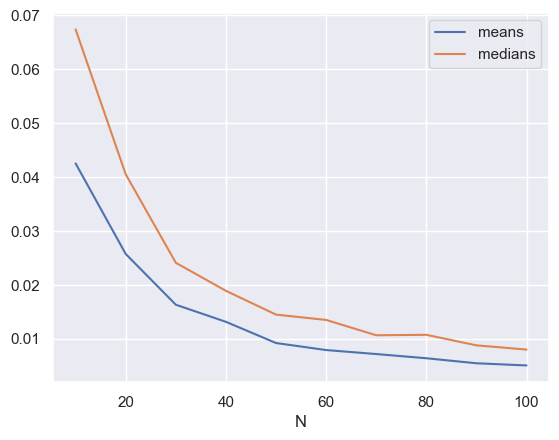

In [77]:
def mse(N):
    X = np.random.normal(0, 1, (1000, 2*N+1))
    means = np.mean(X, axis=1)
    medians = np.median(X, axis=1)
    mse_means = np.mean((-means)**2)
    mse_medians = np.mean((-medians)**2)
    return mse_means, mse_medians

mse_means, mse_medians = [],[]
for N in np.arange(10, 110, 10):
    mean_error, median_error = mse(N)
    print(f"Błąd średniej dla N = {N}: {mean_error}, Błąd mediany dla N = {N}: {median_error}")
    mse_means.append(mean_error)
    mse_medians.append(median_error)

plt.plot(range(10,110,10),mse_means, label = "means")
plt.plot(range(10,110,10),mse_medians, label = "medians")
plt.xlabel("N")
plt.legend();

### ZADANIE 10

Niech $X_1$, $...$, $X_7$ będzie próbą prostą z rozkładu normalnego ze średnią $μ$ i wariancją $σ_2$. Rozpatrzmy dwa estymatory $μ$:

$ Θ_1 = \frac{X_1 + ... + X_7}{7} , Θ_2 = \frac{2X_1 − X_6 + X_4}{2}.$

a) Która statystyka jest lepszym estymatorem parametru $μ$? - NA TABLECIE

b) Znajdź rozkłady statystyk $Θ_1$ oraz $Θ_2$. - NA TABLECIE

c) Wysymuluj 1000 razy $X_1$, $...$, $X_7$ i wyznacz na tej podstawie wartości statystyk $Θ_1$ oraz $Θ_2$. Policz ich dystrybuanty empiryczne i porównaj z dystrybuantami rozkładów wyznaczonych w punkcie (b).

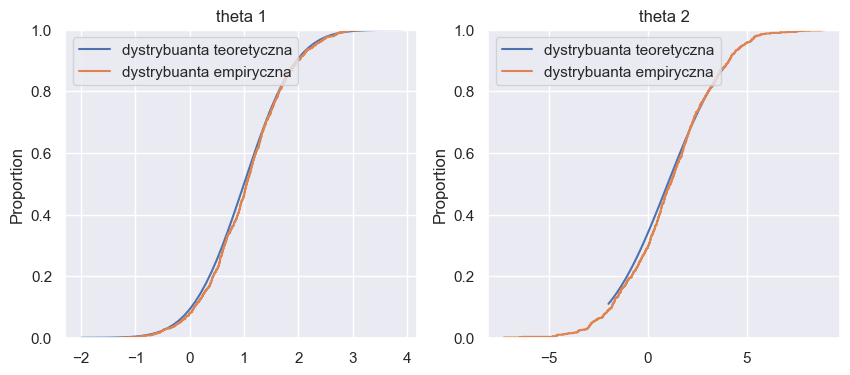

In [80]:
n = 7
sigma = 2
mu = 1
thetas1, thetas2 = [], []
for i in range(1000):
    X = np.random.normal(mu, sigma, n)
    thetas1.append(np.mean(X))
    thetas2.append((2*X[0] - X[5] + X[3])/2)
sample = np.random.normal(mu, sigma, size=(n, 7))
theta1 = sample.mean(axis = 1)
theta2 = (2*sample[:,0] - sample[:,5] + sample[:,3])/2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
xs = np.arange(-2,4,0.1)
ax1.plot(xs, stats.norm.cdf(xs,mu,sigma/(7)**(1/2)),label="dystrybuanta teoretyczna")
ax1.set_title("theta 1")
sns.ecdfplot(thetas1, label="dystrybuanta empiryczna", ax=ax1)
ax1.legend()
xs = np.arange(-2,4,0.1)
ax2.plot(xs, stats.norm.cdf(xs,mu,(3/2)**(1/2)*sigma),label="dystrybuanta teoretyczna")
ax2.set_title("theta 2")
sns.ecdfplot(thetas2, label="dystrybuanta empiryczna", ax=ax2)
ax2.legend()
plt.show()

# LISTA 5

### ZADANIE 3

Wyznacz metodą momentów estymatory parametrów dla rozkładu Gamma. Symulacyjnie sprawdź czy otrzymane estymatory są nieobciążone.

Średnie obciążenie estymatora alfa: 0.015203307890302336
Średnie obciążenie estymatora beta: 0.02025531272716706


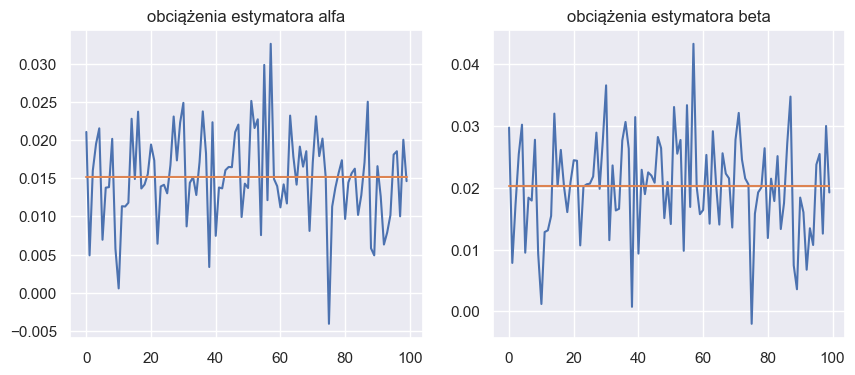

In [81]:
alfa = 4
beta = 5
n = 1000  # dlugosc pojedynczej proby
N = 1000 # liczba powtorzen symulacij monte carlo
M = 100 # ile razy bedziemy to empirycznie wyliczac
bias_alpha, bias_beta = [], []
# wzory wyliczone na tablecie
for m in range(0,M):
    alfa_hats, beta_hats = [], []
    for x in range(0,N):
        samples = np.random.gamma(alfa,1/beta,n)   
        m1 = np.mean(samples)
        m2 = np.mean(samples**2)
        alfa_hats.append(m1**2/(m2-m1**2))
        beta_hats.append(m1/(m2-m1**2))
    bias_alpha.append(np.mean(alfa_hats) - alfa)
    bias_beta.append(np.mean(beta_hats) - beta)
mean_bias_alpha = np.mean(bias_alpha)
mean_bias_beta = np.mean(bias_beta)                
print("Średnie obciążenie estymatora alfa:", mean_bias_alpha)
print("Średnie obciążenie estymatora beta:", mean_bias_beta) 

fig, (ax1,  ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(bias_alpha)
ax1.plot(range(0,100), [mean_bias_alpha for _ in range(0,100)])
ax1.set_title('obciążenia estymatora alfa');
ax2.plot(bias_beta)
ax2.plot(range(0,100), [mean_bias_beta for _ in range(0,100)])
ax2.set_title('obciążenia estymatora beta');

### ZADANIE 4

Dla rozkładu podanego w zadaniu 7 (lista 4) wyznacz estymator parametru $θ$ wykorzystując metodę momentów. Wykorzystując symulacje Monte Carlo sprawdź poprawność estymatora.
Wyniki dla metody momentów porównaj z tymi uzyskanymi dla metody największej wiarogodności.

Text(0.5, 1.0, 'theta uzyskana metoda momentow')

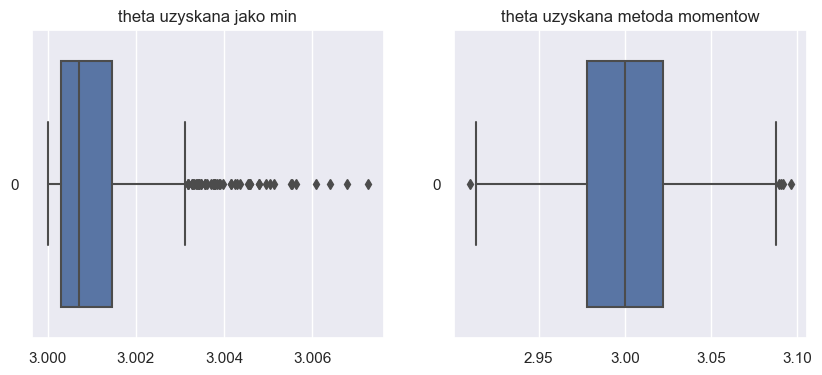

In [82]:
theta_p = 3
n = 1000 # ilosc obserwacji
N = 1000 # ilosc symulacji monte carlo
def theta(t, n):
    exp = np.random.exponential(1,size=n)
    return exp + t
theta_hat_estimate, theta_hat_estimate_mm =[], []
for i in range(0,1000):
    samples=theta(theta_p,n)
    theta_hat_est=min(samples)
    theta_hat_estimate.append(theta_hat_est)
    theta_hat_est_mm=np.mean(samples)-1
    theta_hat_estimate_mm.append(theta_hat_est_mm)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(theta_hat_estimate, ax=ax1, orient='h')
ax1.set_title('theta uzyskana jako min')
sns.boxplot(theta_hat_estimate_mm, ax=ax2, orient='h')
ax2.set_title('theta uzyskana metoda momentow')

### ZADANIE 5

Dla rozkładu podanego w zadaniu 9 (lista 4) wyznacz estymator parametru a wykorzystując metodę momentów. Wykorzystując symulacje Monte Carlo sprawdź poprawność estymatora.
Wyniki dla metody momentów porównaj z tymi uzyskanymi dla metody największej wiarogodności.

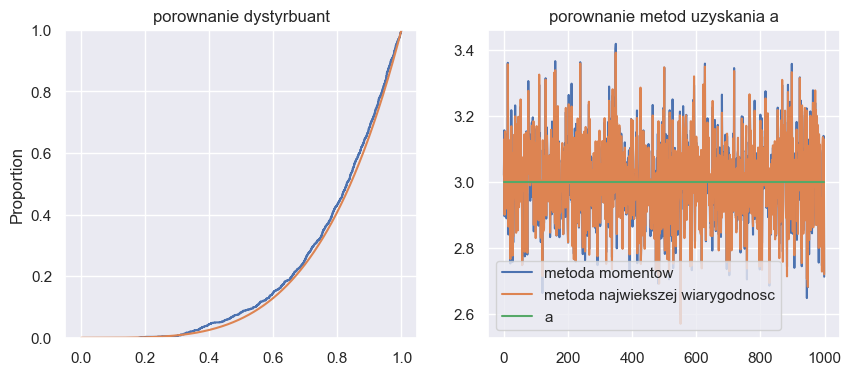

In [86]:
a = 3
n = 1000
a_mms, a_nws = np.zeros(N), np.zeros(N)
for i in range(N):
    U = np.random.uniform(0, 1, n)
    X = U**(1/(a+1))
    a_mms[i] = (1-2*np.mean(X))/(np.mean(X)-1)
    a_nws[i] = -n/np.sum(np.log(X)) - 1  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.ecdfplot(X, ax=ax1)
x = np.linspace(0,1,1000)
y = x**(a+1)
ax1.plot(x,y)
ax1.set_title('porownanie dystyrbuant')
ax2.plot(a_mms, label='metoda momentow')
ax2.plot(a_nws, label='metoda najwiekszej wiarygodnosc')
ax2.plot([3]*1000, label='a')
ax2.legend()
ax2.set_title('porownanie metod uzyskania a');

# LISTA 6

### ZADANIE 1

Na podstawie informacji uzyskanych w 12 losowo wybranych stacjach meteorologicznych wyznaczono (w dniach) średnią długość okresu wegetacyjnego $\overline{X} = 231.33$ dnia oraz $S^2 = 31.44$ dnia. Zakładając, że rozkład badanej cechy jest normalny, zbuduj przedział ufności dla średniej i wariancji długości okresu wegetacyjnego. Przyjmij poziom ufności $α = 0.05$.

In [91]:
# PARAMETRY
a = 0.05
n = 12
X = 231.33
S_k = 31.44
# SREDNIA
kwartyl_t = stats.t.ppf(1-a/2,n-1) # ppf - kwartyl, 1-a/2 - ktory kwartyl, n-1 - stopien swobody
mu = [X-kwartyl_t, X+kwartyl_t]
print(f"przedział ufności dla średniej: {mu}")
# WARIANCJA
kwartyl_chi1 = stats.chi2.ppf(1-a/2,n-1)
kwartyl_chi2 = stats.chi2.ppf(a/2,n-1)
simga_kwadrat = [(n-1)*S_k/kwartyl_chi1, (n-1)*S_k/kwartyl_chi2]
print(f"przedział ufności dla wariancji: {simga_kwadrat}")

przedział ufności dla średniej: [229.12901483991706, 233.53098516008296]
przedział ufności dla wariancji: [15.777336806217022, 90.63491015093341]


### ZADANIE 4

Wysymuluj próbę z rozkładu normalnego o długości $n$ z parametrami $μ = 2.1$ oraz $σ = 0.2$. Wyznacz przedział ufności dla $μ$ przy współczynniku ufności $α = 0.02$. Powtórz te procedurę 1000 razy i sprawdź ile razy teoretyczna wartość $μ$ wpada w wyznaczony przedział ufności. Wyniki sprawdź dla $n = 20$, $50$ oraz $n = 100$. Rozpatrz przypadki, gdy $σ$ jest znana i nieznana.

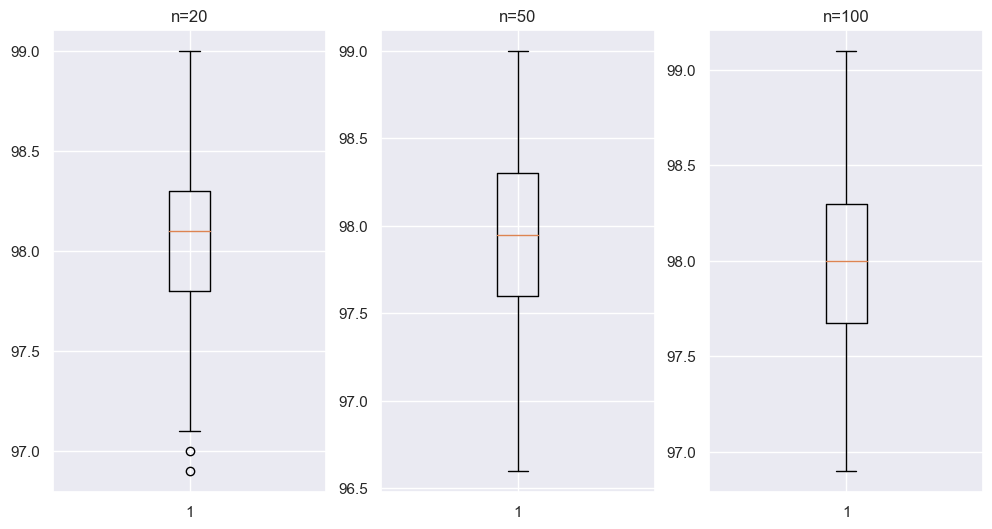

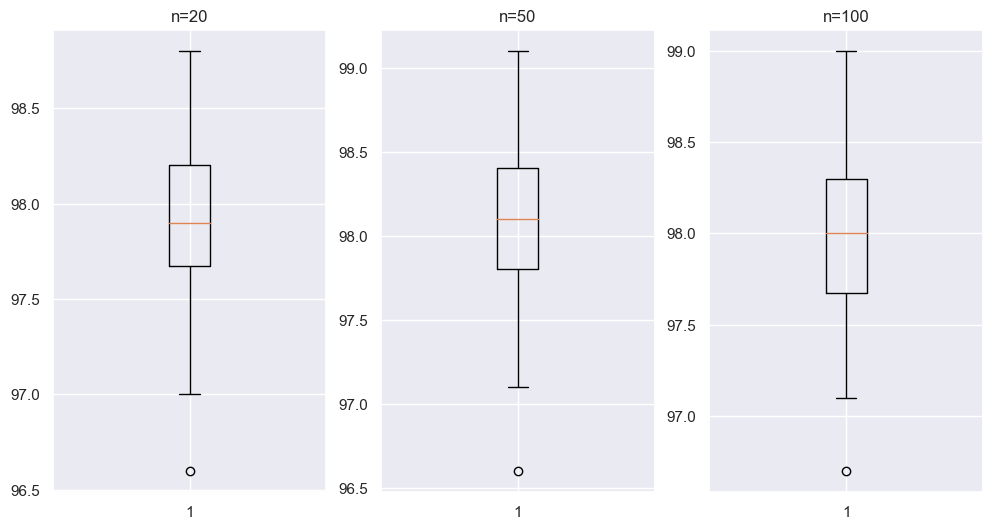

In [92]:
# PARAMETRY
n = 20
mu = 2.1
sigma = 0.2
alpha = 0.02
N = 1000
n_values = [20, 50, 100]
# FUNKCJA DO WYLICZANIA PRZEDZIAŁU UFNOSCI DLA ZNANEJ SIGMY
def confidence_interval_known_sigma(sample, alpha, mu, sigma):
    n = len(sample)
    x_bar = np.mean(sample)
    z = stats.norm.ppf(1 - alpha/2)
    margin_error = z * (sigma / np.sqrt(n))
    lower_bound = x_bar - margin_error
    upper_bound = x_bar + margin_error
    return lower_bound, upper_bound, mu >= lower_bound and mu <= upper_bound
known_sigmas = [[], [], []]
for i, n in enumerate(n_values):
    for _ in range(100):
        num_iterations = 1000
        count_within_interval = 0
        for _ in range(num_iterations):
            sample = np.random.normal(mu, sigma, n)
            confidence_interval = confidence_interval_known_sigma(sample, alpha, mu, sigma)
            if confidence_interval[0] <= mu <= confidence_interval[1]:
                    count_within_interval += 1
        known_sigmas[i].append(count_within_interval/num_iterations*100)

fig, axs = plt.subplots(1, 3, figsize=(12,6))

for i, value in enumerate(known_sigmas):
    axs[i].boxplot(value)

axs[0].set_title("n=20")
axs[1].set_title("n=50")
axs[2].set_title("n=100")
plt.show()

# FUNKCJA DO WYLICZANIA PRZEDZIAŁU UFNOŚĆI DLA NIEZNANEJ SIGMY
def confidence_interval_unknown_sigma(sample, alpha, mu):
    n = len(sample)
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)
    t_val = stats.t.ppf(1 - alpha/2, df=n-1)
    margin_error = t_val * (s / np.sqrt(n))
    lower_bound = x_bar - margin_error
    upper_bound = x_bar + margin_error
    return lower_bound, upper_bound, mu >= lower_bound and mu <= upper_bound
unknown_sigmas = [[], [], []]
for i, n in enumerate(n_values):
    for _ in range(100):
        count_within_interval = 0
        for _ in range(num_iterations):
            sample = np.random.normal(mu, sigma, n)
            confidence_interval = confidence_interval_unknown_sigma(sample, alpha, mu)
            if confidence_interval[0] <= mu <= confidence_interval[1]:
                    count_within_interval += 1
        unknown_sigmas[i].append(count_within_interval/num_iterations*100)  

fig, axs = plt.subplots(1, 3, figsize=(12,6))

for i, value in enumerate(unknown_sigmas):
    axs[i].boxplot(value)

axs[0].set_title("n=20")
axs[1].set_title("n=50")
axs[2].set_title("n=100")
plt.show()

### ZADANIE 5

Niech $X_1$, $...$, $X_n$, $X_{n+1}$ będzie próbą prostą z rozkładu normalnego z nieznaną średnią $μ$ oraz znaną wariancją $σ^2$. Na podstawie próby $X_1$, $...$, $X_n$ chcemy skonstruować przedział, zwany przedziałem predykcji, w którym przewidujemy wartość $X_{n+1}$ z prawdopodobieństwem 0.95.

a) Jaki jest rozkład $X_{n+1} − \frac{1}{n}\sum^n_{i=1}X_i$?

b) Wyznacz teoretyczny przedział ufności dla $X_{n+1}$ wykorzystując punkt a).

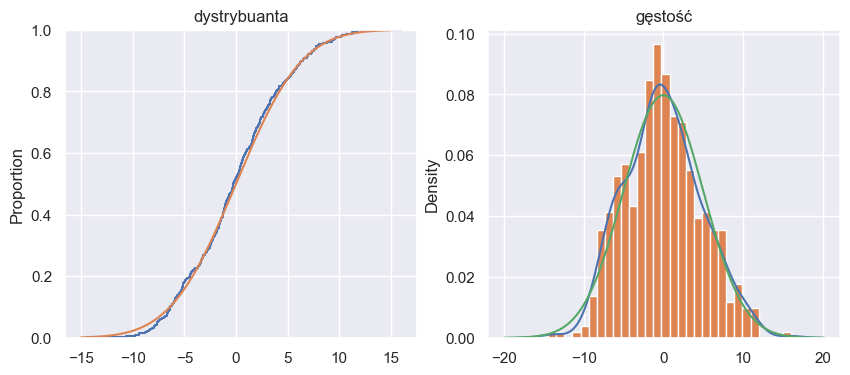

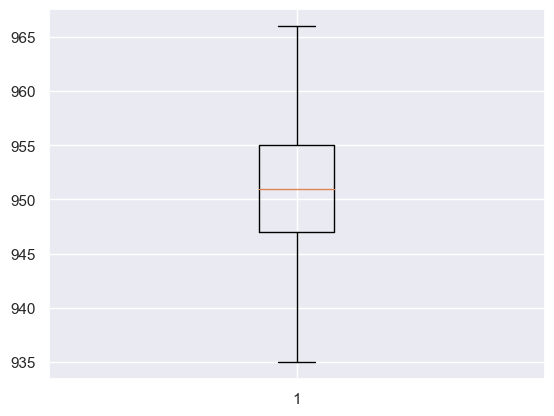

In [93]:
# PODPUNKT A
# PARAMETRY
mu = 2
simga = 5
n = 1000
M = 500

YS = []
for _ in range(M):
    X = np.random.normal(mu, simga, n+1)
    Y = X[-1] - np.sum(X[0:n])/n
    YS.append(Y)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
sns.ecdfplot(YS, ax=ax1)
xs = np.arange(-15,15,0.01)
ax1.plot(xs, stats.norm.cdf(xs, 0, np.sqrt((1+1/n)*simga**2)))
ax1.set_title('dystrybuanta')
sns.kdeplot(YS, ax=ax2)
ax2.hist(YS, density=True, bins=30)
xs = np.arange(-20,20,0.01)
ax2.plot(xs, stats.norm.pdf(xs, 0, np.sqrt((1+1/n)*simga**2)))
ax2.set_title('gęstość')
plt.show()

# PODPUNKT B
# PARAMETRY
mu = 2
sigma = 2
n = 1000
alpha = 0.05
N = 100
M = 1000

ins = []
for _ in range(N):
    count = 0
    for _ in range(M):
        X = np.random.normal(mu, simga, n+1)
        X_hat = np.mean(X)
        z1 = stats.norm.ppf(1-alpha/2)
        interval = [X_hat - z1*np.sqrt((1+1/n)*simga**2), X_hat+z1*np.sqrt((1+1/n)*simga**2)]
        if interval[0] <= X[-1] <= interval[1]:
            count = count+1
    ins.append(count)
    
plt.boxplot(ins);
plt.show()